In [70]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [97]:
clicks_df = pd.read_csv('stud_dates_click.csv')
clicks_df

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
stud_df = pd.read_csv('./data/studentInfo.csv')
stud_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [99]:
score_df = pd.read_csv('final_student_assessment.csv')
score_df

,code_module,code_presentation,id_student,final_result,final_marks
0,AAA,2013J,11391,Pass,82.40
1,AAA,2013J,28400,Pass,65.40
2,AAA,2013J,30268,Withdrawn,0.00
3,AAA,2013J,31604,Pass,76.30
4,AAA,2013J,32885,Pass,55.00
...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.00
32589,GGG,2014J,2645731,Distinction,88.11
32590,GGG,2014J,2648187,Pass,76.67
32591,GGG,2014J,2679821,Withdrawn,91.50


In [100]:
# merge three table for further processing
data = pd.merge(stud_df, clicks_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data = pd.merge(data, score_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,261,262,263,264,265,266,267,268,269,final_marks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.40
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.40
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,76.30
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.11
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.67
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.50


In [101]:
# change the label of target
data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':2, 'Withdrawn':0, 'Fail':0})

# split the data into train and test
dataX = data.drop(columns='final_result')
target = data['final_result']
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [102]:
def prepare_data(X, rule='W'):
    
    #clicks data
    cols = [str(i) for i in range(-25, 270)]
    X1 = X[cols]
    X1 = X1.T
    X1.index = pd.date_range(start='1/1/2014', periods=295)
    X1 = X1.resample(rule).sum()
    X1 = X1.T
    
    # demographic data
    gen_cols = ['gender', 'region', 'highest_education', 'imd_band', 
        'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability']
    cat_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']
    X2 = X[gen_cols]
    for col in cat_cols:
        X2 = pd.concat([X2, pd.get_dummies(X2[col], prefix=col, prefix_sep='_')], axis=1)
        X2.drop(columns=col, inplace=True)
    
    # Assessment score data
    score_cols = 'final_marks'
    X3 = X[score_cols]
    X3 = X3.to_numpy().reshape(-1,1)
        
    return X1, X2, X3

In [103]:
# prepare the data
X_train_clicks, X_train_demographics, X_train_score = prepare_data(X_train)
X_test_clicks, X_test_demographics, X_test_score = prepare_data(X_test)

# print stastic
print('Train Data:', X_train_clicks.shape, X_train_demographics.shape, X_train_score.shape)
print('Test Data: ', X_test_clicks.shape, X_test_demographics.shape, X_test_score.shape)
print('Train target count:', Counter(y_train))
print('Test target count:', Counter(y_test))

Train Data: (26074, 43) (26074, 37) (26074, 1)
Test Data:  (6519, 43) (6519, 37) (6519, 1)
Train target count: Counter({0: 13766, 1: 9889, 2: 2419})
Test target count: Counter({0: 3442, 1: 2472, 2: 605})


In [104]:
from tensorflow.keras import utils
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)

In [105]:
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D, Flatten, Add, Multiply, Softmax, LSTM
from tensorflow.keras import Sequential, Model

# Individual model

In [35]:
# Define model
clicks = Sequential()
clicks.add(Input(shape=(X_train_clicks.shape[1], )))
clicks.add(Dense(128, activation='relu'))
clicks.add(Dense(64, activation='relu'))
clicks.add(Dense(16, activation='relu'))
clicks.add(Dense(3, activation='softmax'))

demographic = Sequential()
demographic.add(Input(shape=(X_train_demographics.shape[1], )))
demographic.add(Dense(128, activation='relu'))
demographic.add(Dense(64, activation='relu'))
demographic.add(Dense(16, activation='relu'))
demographic.add(Dense(3, activation='softmax'))

assignmnet = Sequential()
assignmnet.add(Input(shape=(X_train_score.shape[1], )))
assignmnet.add(Dense(6, activation='relu'))
assignmnet.add(Dense(3, activation='softmax'))

In [37]:
# compile model
clicks.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
demographic.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
assignmnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
def visualize_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train', 'Validation'])
    plt.show()

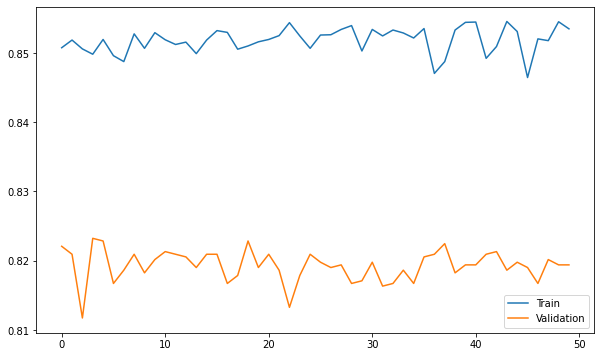

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3132
           1       0.96      0.70      0.81      3387
           2       0.00      0.00      0.00         0

    accuracy                           0.83      6519
   macro avg       0.61      0.56      0.58      6519
weighted avg       0.92      0.83      0.87      6519



In [41]:
# model based on only clicks
hist1 = clicks.fit(X_train_clicks, y_train_cat, validation_split=0.1, epochs=50, batch_size=10, verbose=0)
visualize_loss(hist1)

# predict
predict = clicks.predict(X_test_clicks)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

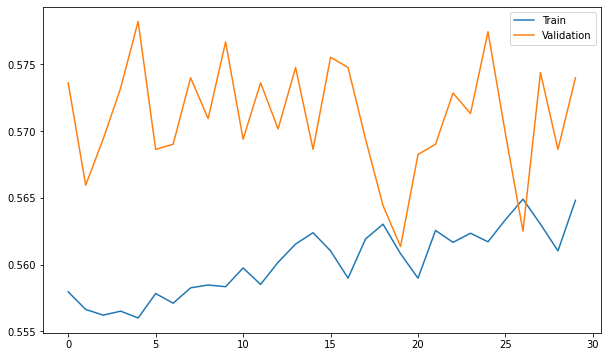

              precision    recall  f1-score   support

           0       0.83      0.59      0.69      4863
           1       0.33      0.49      0.39      1645
           2       0.00      0.18      0.01        11

    accuracy                           0.56      6519
   macro avg       0.39      0.42      0.36      6519
weighted avg       0.70      0.56      0.61      6519



In [43]:
# model based on only demographics
hist2 = demographic.fit(X_train_demographics, y_train_cat, validation_split=0.1, epochs=30, batch_size=10, verbose=0)
visualize_loss(hist2)

# predict
predict = demographic.predict(X_test_demographics)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

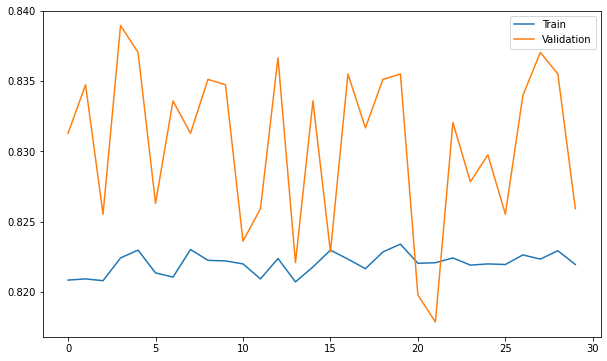

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3228
           1       0.91      0.71      0.80      3140
           2       0.18      0.72      0.29       151

    accuracy                           0.82      6519
   macro avg       0.65      0.79      0.66      6519
weighted avg       0.87      0.82      0.84      6519



In [45]:
# model based on only assessment
hist3 = assignmnet.fit(X_train_score, y_train_cat, validation_split=0.1, epochs=30, batch_size=10, verbose=0)
visualize_loss(hist3)

# predict
predict = assignmnet.predict(X_test_score)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

# combine all three models

In [48]:
# Define model
input1 = Input(shape=(X_train_clicks.shape[1], ))
x1 = Dense(128, activation='relu')(input1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dense(16, activation='relu')(x1)
x1 = Dense(3, activation='relu')(x1)


input2 = Input(shape=(X_train_demographics.shape[1], ))
x2 = Dense(128, activation='relu')(input2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(16, activation='relu')(x2)
x2 = Dense(3, activation='relu')(x2)


input3 = Input(shape=(X_train_score.shape[1], ))
x3 = Dense(6, activation='relu')(input3)
x3 = Dense(3, activation='relu')(x3)

out4 = Add()([x1, x2, x3])
out = Softmax()(out4)

combine_model = Model(inputs=[input1, input2, input3], outputs=out)
print(combine_model.summary())
combine_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 43)]         0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 37)]         0                                            
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 128)          5632        input_11[0][0]                   
__________________________________________________________________________________________________
dense_39 (Dense)                (None, 128)          4864        input_12[0][0]                   
____________________________________________________________________________________________

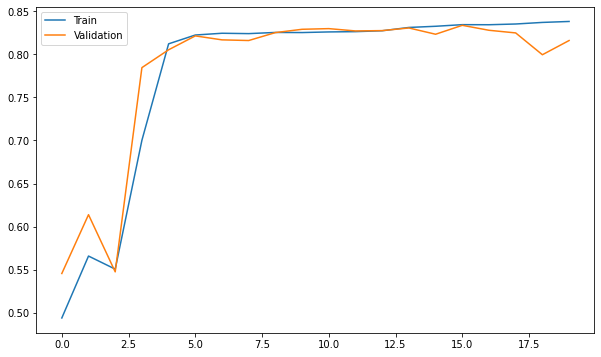

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      3614
           1       0.86      0.73      0.79      2905
           2       0.00      0.00      0.00         0

    accuracy                           0.82      6519
   macro avg       0.60      0.54      0.57      6519
weighted avg       0.90      0.82      0.85      6519



/home/ramesh/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
hist = combine_model.fit([X_train_clicks, X_train_demographics, X_train_score], y_train_cat,
                         validation_split=0.1, epochs=20, batch_size=32, verbose=0)
visualize_loss(hist)

predict = combine_model.predict([X_test_clicks, X_test_demographics, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

# this dataset is imbalance dataset, so lets compute the class weight and assign it to the model

In [61]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6313622935735387, 1: 0.878889001247177, 2: 3.5929447430067523}

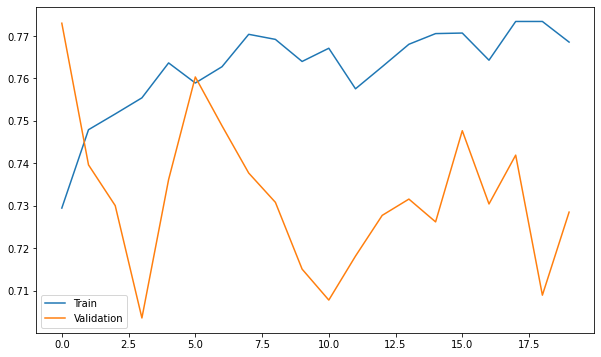

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      4361
           1       0.65      0.74      0.69      2158
           2       0.00      0.00      0.00         0

    accuracy                           0.74      6519
   macro avg       0.53      0.49      0.50      6519
weighted avg       0.84      0.74      0.78      6519



/home/ramesh/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
hist = combine_model.fit([X_train_clicks, X_train_demographics, X_train_score], y_train_cat,
                         validation_split=0.1, epochs=20, batch_size=32, verbose=0, class_weight=class_weights)
visualize_loss(hist)

predict = combine_model.predict([X_test_clicks, X_test_demographics, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

# check for individial models

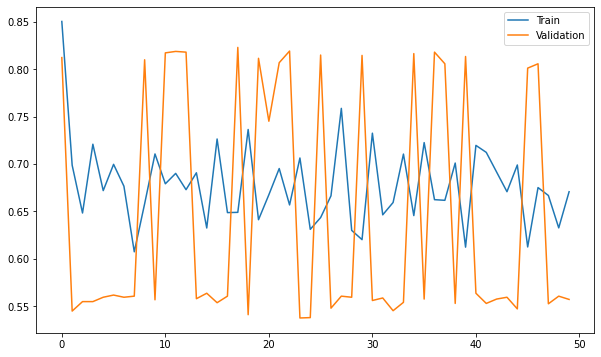

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3075
           1       0.00      0.43      0.01        21
           2       0.99      0.17      0.30      3423

    accuracy                           0.55      6519
   macro avg       0.62      0.53      0.41      6519
weighted avg       0.93      0.55      0.59      6519



In [62]:
# model based on only clicks
hist1 = clicks.fit(X_train_clicks, y_train_cat, validation_split=0.1, epochs=50, batch_size=10, verbose=0,
                  class_weight=class_weights)
visualize_loss(hist1)

# predict
predict = clicks.predict(X_test_clicks)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

# Finding

- Using class weights for balancing the dataset is not helping 
- Using clicks data only gives 83% of accuracy
- combine model is not imporving the result

# LSTM model

In [106]:
# Convert the data into 3-dimensional
X_train_clicks = X_train_clicks.to_numpy().reshape(X_train_clicks.shape[0], X_train_clicks.shape[1], 1)
X_test_clicks = X_test_clicks.to_numpy().reshape(X_test_clicks.shape[0], X_test_clicks.shape[1], 1)

# convert data into 3-d
X_train_demographics = X_train_demographics.to_numpy().reshape(X_train_demographics.shape[0], X_train_demographics.shape[1], 1)
X_test_demographics = X_test_demographics.to_numpy().reshape(X_test_demographics.shape[0], X_test_demographics.shape[1], 1)

X_train_score = X_train_score.reshape(X_train_score.shape[0], X_train_score.shape[1], 1)
X_test_score = X_test_score.reshape(X_test_score.shape[0], X_test_score.shape[1], 1)

In [82]:
# Define the model
clicks_lstm = Sequential()
clicks_lstm.add(LSTM(25, activation='relu', input_shape=(X_train_clicks.shape[1],1), return_sequences=True))
# clicks_lstm.add(LSTM(50, activation='relu', return_sequences=True))
# clicks_lstm.add(LSTM(25, activation='relu', return_sequences=True))
clicks_lstm.add(LSTM(10, activation='relu', return_sequences=False))
clicks_lstm.add(Dense(3, activation='softmax'))

# compile the model
clicks_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/20
734/734 - 54s - loss: 5.3532 - accuracy: 0.5810 - val_loss: 1.7357 - val_accuracy: 0.6702
Epoch 2/20
734/734 - 52s - loss: 1.0479 - accuracy: 0.6742 - val_loss: 0.9677 - val_accuracy: 0.6863
Epoch 3/20
734/734 - 54s - loss: 0.8738 - accuracy: 0.6942 - val_loss: 0.8091 - val_accuracy: 0.7120
Epoch 4/20
734/734 - 55s - loss: 0.7333 - accuracy: 0.7061 - val_loss: 0.7420 - val_accuracy: 0.7025
Epoch 5/20
734/734 - 55s - loss: 0.7051 - accuracy: 0.6937 - val_loss: 0.9867 - val_accuracy: 0.6825
Epoch 6/20
734/734 - 56s - loss: 0.7244 - accuracy: 0.6893 - val_loss: 0.6725 - val_accuracy: 0.6883
Epoch 7/20
734/734 - 57s - loss: 0.7074 - accuracy: 0.7096 - val_loss: 0.7089 - val_accuracy: 0.7147
Epoch 8/20
734/734 - 60s - loss: 0.7711 - accuracy: 0.6672 - val_loss: 0.8113 - val_accuracy: 0.5422
Epoch 9/20
734/734 - 50s - loss: 0.8648 - accuracy: 0.5923 - val_loss: 0.6822 - val_accuracy: 0.7124
Epoch 10/20
734/734 - 55s - loss: 0.6935 - accuracy: 0.7299 - val_loss: 0.6898 - val_accura

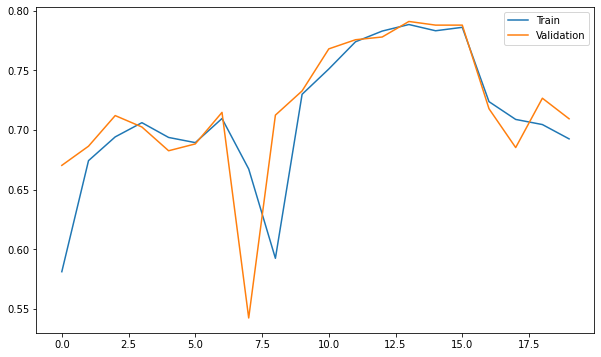

In [83]:
hist = clicks_lstm.fit(X_train_clicks, y_train_cat, validation_split=0.1, epochs=20, batch_size=32, verbose=2)
visualize_loss(hist)

In [84]:
# predict
predict = clicks_lstm.predict(X_test_clicks)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      3779
           1       0.71      0.64      0.68      2730
           2       0.00      0.30      0.01        10

    accuracy                           0.72      6519
   macro avg       0.52      0.57      0.50      6519
weighted avg       0.79      0.72      0.75      6519



# CNN base model

In [88]:
# define model
clicks_cnn = Sequential()
clicks_cnn.add(Input(shape=(X_train_clicks.shape[1], 1)))
clicks_cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
clicks_cnn.add(AveragePooling1D(2))
clicks_cnn.add(Conv1D(64, kernel_size=2, activation='relu'))
clicks_cnn.add(AveragePooling1D(2))
clicks_cnn.add(Conv1D(128, kernel_size=2, activation='relu'))
clicks_cnn.add(AveragePooling1D(2))
clicks_cnn.add(Flatten())
clicks_cnn.add(Dense(128,  activation='relu'))
clicks_cnn.add(Dense(64,  activation='relu'))
clicks_cnn.add(Dense(32,  activation='relu'))
clicks_cnn.add(Dense(3,  activation='softmax'))

# compile the model
clicks_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/20
734/734 - 12s - loss: 0.5139 - accuracy: 0.8156 - val_loss: 0.4471 - val_accuracy: 0.8278
Epoch 2/20
734/734 - 10s - loss: 0.4456 - accuracy: 0.8284 - val_loss: 0.4461 - val_accuracy: 0.8298
Epoch 3/20
734/734 - 11s - loss: 0.4412 - accuracy: 0.8296 - val_loss: 0.4606 - val_accuracy: 0.8175
Epoch 4/20
734/734 - 10s - loss: 0.4361 - accuracy: 0.8312 - val_loss: 0.4387 - val_accuracy: 0.8271
Epoch 5/20
734/734 - 12s - loss: 0.4333 - accuracy: 0.8306 - val_loss: 0.4352 - val_accuracy: 0.8282
Epoch 6/20
734/734 - 9s - loss: 0.4306 - accuracy: 0.8298 - val_loss: 0.4347 - val_accuracy: 0.8290
Epoch 7/20
734/734 - 8s - loss: 0.4253 - accuracy: 0.8315 - val_loss: 0.4291 - val_accuracy: 0.8282
Epoch 8/20
734/734 - 13s - loss: 0.4219 - accuracy: 0.8333 - val_loss: 0.4266 - val_accuracy: 0.8301
Epoch 9/20
734/734 - 7s - loss: 0.4170 - accuracy: 0.8335 - val_loss: 0.4341 - val_accuracy: 0.8252
Epoch 10/20
734/734 - 5s - loss: 0.4118 - accuracy: 0.8355 - val_loss: 0.4296 - val_accuracy: 

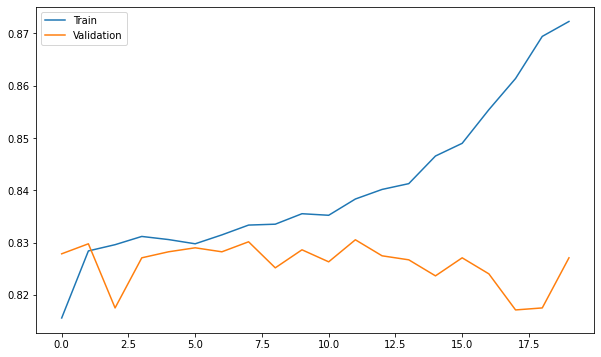

In [89]:
from tensorflow.keras.callbacks import ModelCheckpoint

path = 'best_model.h5'
callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

hist = clicks_cnn.fit(X_train_clicks, y_train_cat, validation_split=0.1, epochs=20, batch_size=32, verbose=2, callbacks=[callbacks])
visualize_loss(hist)

In [90]:
# predict
predict = clicks_cnn.predict(X_test_clicks)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3296
           1       0.89      0.71      0.79      3088
           2       0.06      0.27      0.10       135

    accuracy                           0.82      6519
   macro avg       0.62      0.64      0.60      6519
weighted avg       0.88      0.82      0.84      6519



In [92]:
# load best model
clicks_cnn.load_weights(path)
predict = clicks_cnn.predict(X_test_clicks)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3174
           1       0.96      0.71      0.82      3315
           2       0.02      0.37      0.03        30

    accuracy                           0.84      6519
   macro avg       0.62      0.68      0.59      6519
weighted avg       0.92      0.84      0.87      6519



# combine model based on cnn

In [112]:
# define model

input1 = Input(shape=(X_train_clicks.shape[1], 1))
out1 = Conv1D(32, kernel_size=2, activation='relu')(input1)
out1 = AveragePooling1D(2)(out1)
out1 = Conv1D(64, kernel_size=2, activation='relu')(out1)
out1 = AveragePooling1D(2)(out1)
out1 = Conv1D(128, kernel_size=2, activation='relu')(out1)
out1 = AveragePooling1D(2)(out1)
out1 = Flatten()(out1)
out1 = Dense(128,  activation='relu')(out1)
out1 = Dense(64,  activation='relu')(out1)
out1 = Dense(32,  activation='relu')(out1)
out1 = Dense(3,  activation='relu')(out1)


input2 = Input(shape=(X_train_demographics.shape[1], 1))
out2 = Conv1D(8, kernel_size=2, activation='relu')(input2)
out2 = AveragePooling1D(2)(out2)
out2 = Conv1D(16, kernel_size=2, activation='relu')(out2)
out2 = AveragePooling1D(2)(out2)
out2 = Flatten()(out2)
out2 = Dense(64,  activation='relu')(out2)
out2 = Dense(32,  activation='relu')(out2)
out2 = Dense(3,  activation='relu')(out2)

input3 = Input(shape=(X_train_score.shape[1], 1))
out3 = Conv1D(3, kernel_size=1, activation='relu')(input3)
out3 = Flatten()(out3)


out4 = Add()([out1, out2, out3])
out = Softmax()(out4)

combine_cnn_model = Model(inputs=[input1, input2, input3], outputs=out)

# compile the model
combine_cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
734/734 - 4s - loss: 2.3331 - accuracy: 0.8114 - val_loss: 0.5366 - val_accuracy: 0.7987
Epoch 2/10
734/734 - 3s - loss: 0.4770 - accuracy: 0.8318 - val_loss: 0.4887 - val_accuracy: 0.8271
Epoch 3/10
734/734 - 3s - loss: 0.4646 - accuracy: 0.8359 - val_loss: 0.4739 - val_accuracy: 0.8290
Epoch 4/10
734/734 - 3s - loss: 0.4595 - accuracy: 0.8361 - val_loss: 0.4682 - val_accuracy: 0.8313
Epoch 5/10
734/734 - 4s - loss: 0.4521 - accuracy: 0.8377 - val_loss: 0.4650 - val_accuracy: 0.8328
Epoch 6/10
734/734 - 5s - loss: 0.4492 - accuracy: 0.8366 - val_loss: 0.4651 - val_accuracy: 0.8294
Epoch 7/10
734/734 - 3s - loss: 0.4500 - accuracy: 0.8371 - val_loss: 0.4610 - val_accuracy: 0.8317
Epoch 8/10
734/734 - 3s - loss: 0.4467 - accuracy: 0.8352 - val_loss: 0.4591 - val_accuracy: 0.8328
Epoch 9/10
734/734 - 3s - loss: 0.4432 - accuracy: 0.8368 - val_loss: 0.4601 - val_accuracy: 0.8317
Epoch 10/10
734/734 - 3s - loss: 0.4420 - accuracy: 0.8367 - val_loss: 0.4585 - val_accuracy: 0.8336

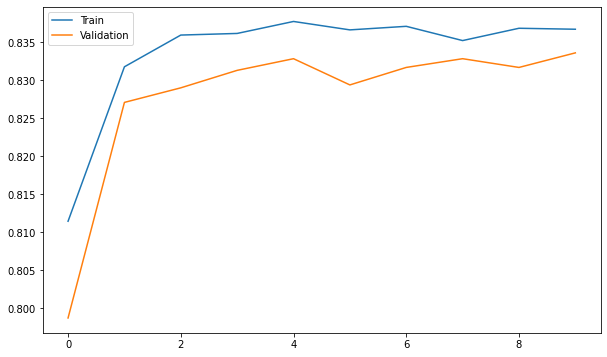

In [113]:
hist = combine_cnn_model.fit([X_train_clicks, X_train_demographics, X_train_score], y_train_cat, validation_split=0.1, epochs=10, batch_size=32, verbose=2, callbacks=[callbacks])
visualize_loss(hist)

In [114]:
# predict
predict = combine_cnn_model.predict([X_test_clicks, X_test_demographics, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3146
           1       0.96      0.70      0.81      3373
           2       0.00      0.00      0.00         0

    accuracy                           0.83      6519
   macro avg       0.61      0.56      0.58      6519
weighted avg       0.92      0.83      0.87      6519



In [115]:
# predict
combine_cnn_model.load_weights(path)
predict = combine_cnn_model.predict([X_test_clicks, X_test_demographics, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3146
           1       0.96      0.70      0.81      3373
           2       0.00      0.00      0.00         0

    accuracy                           0.83      6519
   macro avg       0.61      0.56      0.58      6519
weighted avg       0.92      0.83      0.87      6519



# Exclude demographics

In [122]:
# define model

input1 = Input(shape=(X_train_clicks.shape[1], 1))
out1 = Conv1D(32, kernel_size=2, activation='relu')(input1)
out1 = AveragePooling1D(2)(out1)
out1 = Conv1D(64, kernel_size=2, activation='relu')(out1)
out1 = AveragePooling1D(2)(out1)
out1 = Conv1D(128, kernel_size=2, activation='relu')(out1)
out1 = AveragePooling1D(2)(out1)
out1 = Flatten()(out1)
out1 = Dense(128,  activation='relu')(out1)
out1 = Dense(64,  activation='relu')(out1)
out1 = Dense(32,  activation='relu')(out1)
out1 = Dense(6,  activation='relu')(out1)


input3 = Input(shape=(X_train_score.shape[1], 1))
out3 = Conv1D(6, kernel_size=1, activation='relu')(input3)
out3 = Flatten()(out3)


out4 = Add()([out1, out3])
out = Dense(3, activation='softmax')(out4)

combine_cnn_model = Model(inputs=[input1, input3], outputs=out)

# compile the model
combine_cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
734/734 - 3s - loss: 7.5101 - accuracy: 0.7627 - val_loss: 0.5467 - val_accuracy: 0.7849
Epoch 2/10
734/734 - 3s - loss: 0.4484 - accuracy: 0.8283 - val_loss: 0.4563 - val_accuracy: 0.8290
Epoch 3/10
734/734 - 3s - loss: 0.4090 - accuracy: 0.8344 - val_loss: 0.4322 - val_accuracy: 0.8033
Epoch 4/10
734/734 - 3s - loss: 0.3936 - accuracy: 0.8378 - val_loss: 0.4347 - val_accuracy: 0.8324
Epoch 5/10
734/734 - 3s - loss: 0.3815 - accuracy: 0.8410 - val_loss: 0.3838 - val_accuracy: 0.8363
Epoch 6/10
734/734 - 4s - loss: 0.3789 - accuracy: 0.8414 - val_loss: 0.3798 - val_accuracy: 0.8413
Epoch 7/10
734/734 - 5s - loss: 0.3737 - accuracy: 0.8453 - val_loss: 0.3956 - val_accuracy: 0.8351
Epoch 8/10
734/734 - 3s - loss: 0.3736 - accuracy: 0.8435 - val_loss: 0.3735 - val_accuracy: 0.8405
Epoch 9/10
734/734 - 3s - loss: 0.3649 - accuracy: 0.8485 - val_loss: 0.4040 - val_accuracy: 0.8378
Epoch 10/10
734/734 - 3s - loss: 0.3617 - accuracy: 0.8491 - val_loss: 0.3918 - val_accuracy: 0.8370

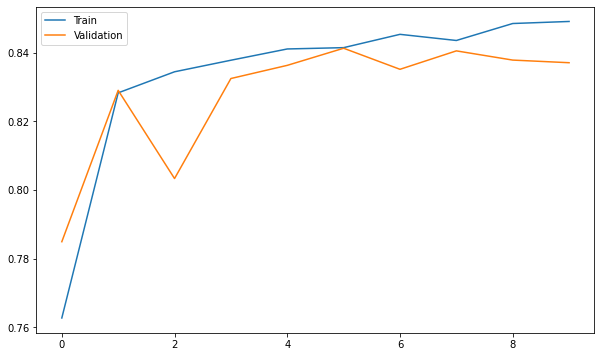

In [123]:
hist = combine_cnn_model.fit([X_train_clicks, X_train_score], y_train_cat, validation_split=0.1, epochs=10, batch_size=32, verbose=2, callbacks=[callbacks])
visualize_loss(hist)

In [124]:
# predict
predict = combine_cnn_model.predict([X_test_clicks, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3103
           1       0.96      0.71      0.82      3357
           2       0.05      0.54      0.10        59

    accuracy                           0.84      6519
   macro avg       0.63      0.74      0.61      6519
weighted avg       0.92      0.84      0.86      6519



In [125]:
# predict
combine_cnn_model.load_weights(path)
predict = combine_cnn_model.predict([X_test_clicks, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3300
           1       0.90      0.74      0.81      2984
           2       0.23      0.60      0.34       235

    accuracy                           0.84      6519
   macro avg       0.68      0.76      0.69      6519
weighted avg       0.88      0.84      0.85      6519

